In [1]:
import guides
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mode1 = guides.TE_MGMode(mode=1, mirror_distance=7e-6, wavelength=1.55e-6)
mode2 = guides.TE_MGMode(mode=2, mirror_distance=7e-6, wavelength=1.55e-6)

y_range = np.linspace(-3.5e-6, 3.5e-6, 1000)
z_range = np.linspace(0, 1e-4, 1000)

yy, zz = np.meshgrid(y_range, z_range)

In [3]:
Ex1 = mode1.Ex(yy, zz)
Ex2 = mode2.Ex(yy, zz)

Ex = Ex1 + Ex2
ExEx = np.real( Ex * np.conjugate(Ex) )

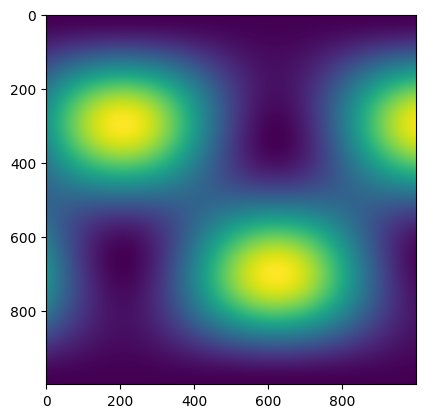

In [4]:
plt.imshow(ExEx.T)
plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_8324\1949394998.py:5: RuntimeWarning: divide by zero encountered in divide
  left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \


(0.0, 100.0)

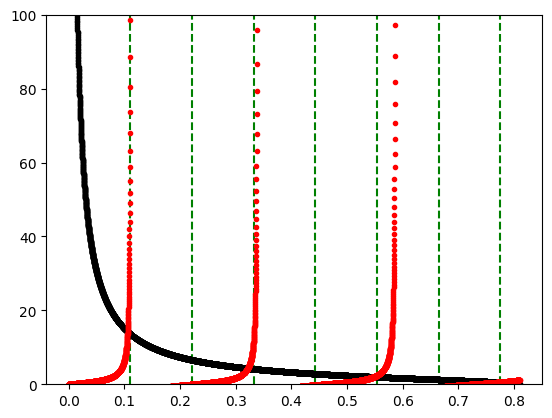

In [12]:
d_mode1 = guides.TE_PDGMode(0, 1.45, 1, 1.55e-6, 7e-6)

thetas = np.linspace(0, d_mode1.theta_c, 10000)

left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \
                                / np.cos(d_mode1.theta_c)**2

right_side_equation = lambda theta: np.tan(np.pi * d_mode1.d/d_mode1.wl * np.sin(theta) \
                                           - 0.5*d_mode1.m * np.pi)

for i in range(1,d_mode1.maximum_mode()+1):
    plt.vlines(i * d_mode1.wl / (2*d_mode1.d), 0, 100, colors='green', linestyles='dashed')

plt.plot(thetas, left_side_equation(thetas), 'k.')
plt.plot(thetas, right_side_equation(thetas), 'r.')
plt.ylim(0,100)

d:\Desktop\Aprendizado\Doutorado\Doutorado.Vault\Classes\Optics and photonics\Programs\OptSim\src\optsim\guides.py:176: RuntimeWarning: divide by zero encountered in divide
  B = _np.sqrt( _np.sin(self.theta_c)**2 / _np.sin(theta_test)**2 - 1 )


(-10.0, 10.0)

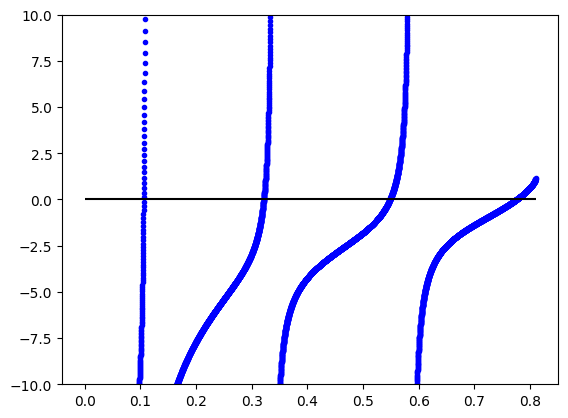

In [6]:
TM_d_mode = guides.TM_PDGMode(0, 1.45, 1, 1.55e-6, 7e-6)

plt.plot(thetas, TM_d_mode._consistency_condition(thetas), 'b.')
plt.hlines(0, 0, TM_d_mode.theta_c, colors='black')
plt.ylim(-10, 10)